In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('c://Users//Shravya//Downloads//Logistic_Regression_Assignment//heart.csv',sep='\t')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,True,Normal,150,No,2.3,Up_Sloping,0,1,Yes
1,37,Male,non-anginal pain,130,250,False,Not_Normal,187,No,3.5,Up_Sloping,0,2,Yes
2,41,Female,atypical angina,130,204,False,Normal,172,No,1.4,Down_Sloping,0,2,Yes
3,56,Male,atypical angina,120,236,False,Not_Normal,178,No,0.8,Down_Sloping,0,2,Yes
4,57,Female,typical angina,120,354,False,Not_Normal,163,Yes,0.6,Down_Sloping,0,2,Yes


In [3]:
df.describe(include='all')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303,303,303.000000,303.000000,303,303,303.000000,303,303.000000,303,303.000000,303.000000,303
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,NaN,2
top,NaN,Male,typical angina,NaN,NaN,False,Not_Normal,NaN,No,NaN,Down_Sloping,NaN,NaN,Yes
freq,NaN,207,143,NaN,NaN,258,154,NaN,204,NaN,142,NaN,NaN,165
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,1.039604,NaN,0.729373,2.313531,NaN
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,1.161075,NaN,1.022606,0.612277,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,0.000000,2.000000,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,0.000000,2.000000,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,NaN,1.000000,3.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 31.2+ KB


In [5]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,True,Normal,150,No,2.3,Up_Sloping,0,1,Yes
1,37,Male,non-anginal pain,130,250,False,Not_Normal,187,No,3.5,Up_Sloping,0,2,Yes
2,41,Female,atypical angina,130,204,False,Normal,172,No,1.4,Down_Sloping,0,2,Yes
3,56,Male,atypical angina,120,236,False,Not_Normal,178,No,0.8,Down_Sloping,0,2,Yes
4,57,Female,typical angina,120,354,False,Not_Normal,163,Yes,0.6,Down_Sloping,0,2,Yes


## Exploratory data analysis on numerical columns


C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

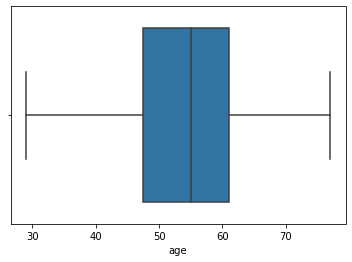

In [8]:
#age
sns.boxplot(df.age)

In [9]:
##there are no outliers in age

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

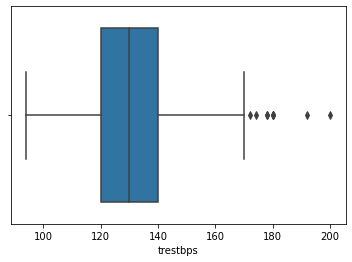

In [10]:
sns.boxplot(df.trestbps)

In [11]:
## we found that trestbps is having outliers. so we have to remove outliers

In [12]:
#finding iqr
percentile25=df['trestbps'].quantile(0.25)
percentile75=df['trestbps'].quantile(0.75)
iqr=percentile75-percentile25
iqr

20.0

In [13]:
upper_limit=percentile75+ 1.5*iqr
lower_limit=percentile25-1.5*iqr

In [14]:
new_df=df.copy()
new_df['trestbps'] = np.where(
    new_df['trestbps'] > upper_limit,
    upper_limit,
    np.where(
        new_df['trestbps'] < lower_limit,
        lower_limit,
        new_df['trestbps']
    )
)

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

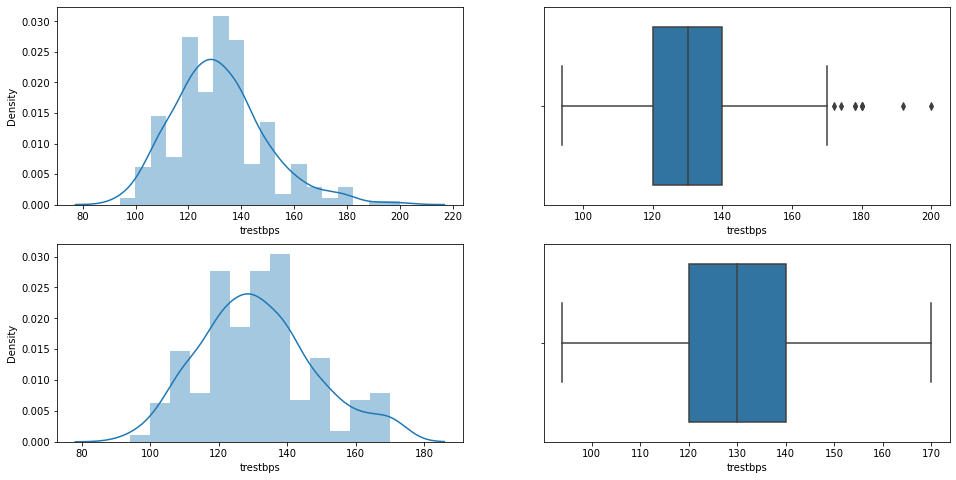

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['trestbps'])
plt.subplot(2,2,2)
sns.boxplot(df['trestbps'])
plt.subplot(2,2,3)
sns.distplot(new_df['trestbps'])
plt.subplot(2,2,4)
sns.boxplot(new_df['trestbps'])
plt.show()

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

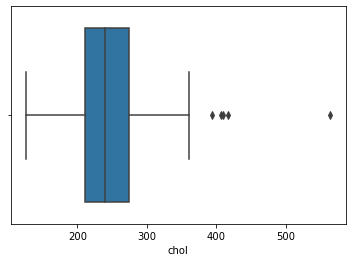

In [16]:
#chol
sns.boxplot(new_df.chol)

In [17]:
#chol is having outliers. we need to remove outliers


In [18]:
percentile25=df['chol'].quantile(0.25)
percentile75=df['chol'].quantile(0.75)
iqr=percentile75-percentile25
iqr

63.5

In [19]:
upper_limit=percentile75+ 1.5*iqr
lower_limit=percentile25-1.5*iqr

In [20]:
new_df=df.copy()
new_df['chol'] = np.where(
    new_df['chol'] > upper_limit,
    upper_limit,
    np.where(
        new_df['chol'] < lower_limit,
        lower_limit,
        new_df['chol']
    )
)

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

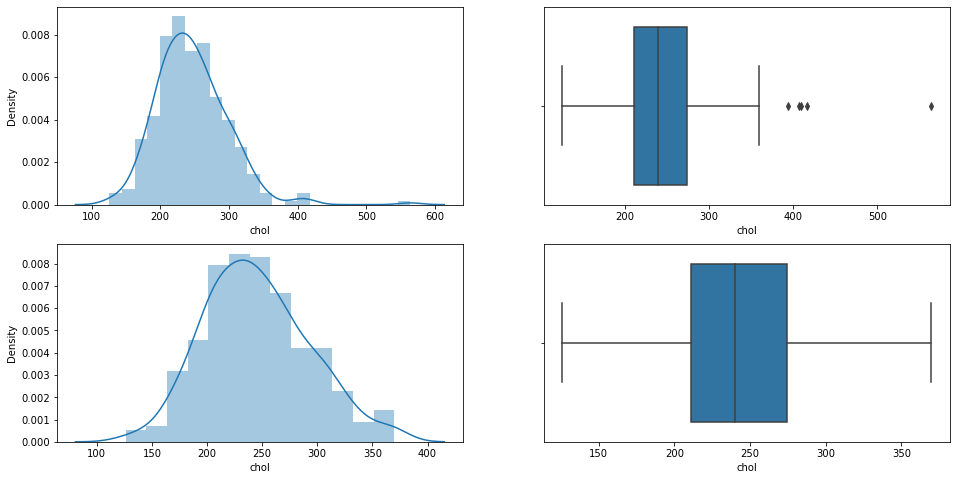

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['chol'])
plt.subplot(2,2,2)
sns.boxplot(df['chol'])
plt.subplot(2,2,3)
sns.distplot(new_df['chol'])
plt.subplot(2,2,4)
sns.boxplot(new_df['chol'])
plt.show()

In [22]:
##After iqr calculations outliers are removed.now it is normally distributed without outliers


C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

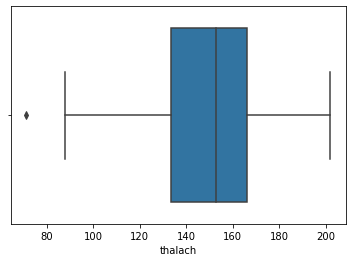

In [23]:
#thalach
sns.boxplot(df.thalach)

In [24]:
percentile25=df['thalach'].quantile(0.25)
percentile75=df['thalach'].quantile(0.75)
iqr=percentile75-percentile25
iqr

32.5

In [25]:
upper_limit=percentile75+ 1.5*iqr
lower_limit=percentile25-1.5*iqr

In [26]:
new_df=df.copy()
new_df['thalach'] = np.where(
    new_df['thalach'] > upper_limit,
    upper_limit,
    np.where(
        new_df['thalach'] < lower_limit,
        lower_limit,
        new_df['thalach']
    )
)

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

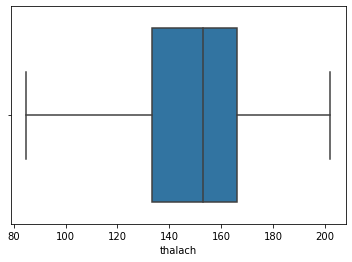

In [27]:
sns.boxplot(new_df.thalach)

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

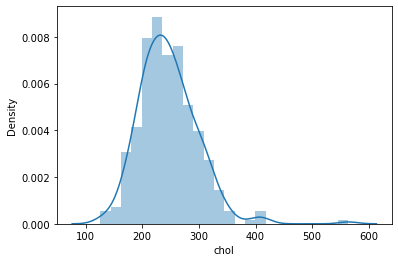

In [28]:
sns.distplot(new_df['chol'])

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca'>

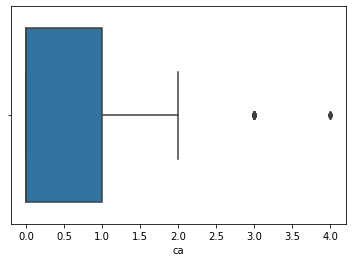

In [29]:
#ca
sns.boxplot(df.ca)

In [30]:
percentile25=df['ca'].quantile(0.25)
percentile75=df['ca'].quantile(0.75)
iqr=percentile75-percentile25
iqr

1.0

In [31]:
upper_limit=percentile75+ 1.5*iqr
lower_limit=percentile25-1.5*iqr

In [32]:
new_df=df.copy()
new_df['ca'] = np.where(
    new_df['ca'] > upper_limit,
    upper_limit,
    np.where(
        new_df['ca'] < lower_limit,
        lower_limit,
        new_df['ca']
    )
)

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca'>

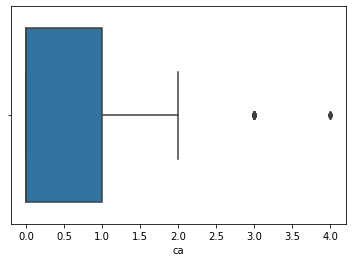

In [33]:
sns.boxplot(df.ca)


C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ca', ylabel='Density'>

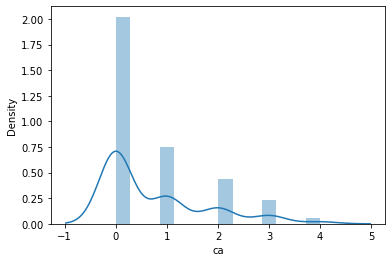

In [34]:
sns.distplot(df.ca)

In [35]:
ind_names = new_df[ new_df['ca'] > 2.5].index

In [36]:
new_df.drop(ind_names,inplace=True)

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

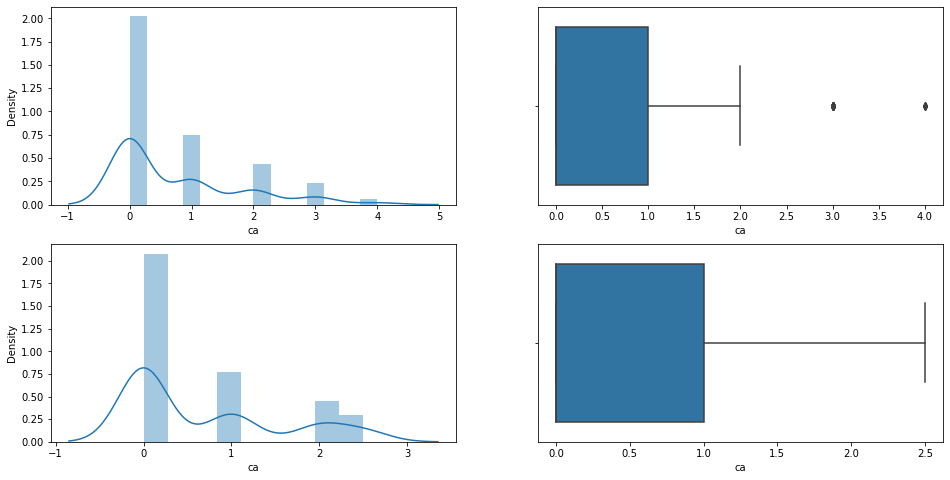

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['ca'])
plt.subplot(2,2,2)
sns.boxplot(df['ca'])
plt.subplot(2,2,3)
sns.distplot(new_df['ca'])
plt.subplot(2,2,4)
sns.boxplot(new_df['ca'])
plt.show()

In [38]:
percentile25=df['oldpeak'].quantile(0.25)
percentile75=df['oldpeak'].quantile(0.75)
iqr=percentile75-percentile25
iqr

1.6

In [39]:
upper_limit=percentile75+ 1.5*iqr
lower_limit=percentile25-1.5*iqr

In [40]:
indi_names = new_df[ new_df['oldpeak'] > 4].index

In [41]:
new_df.drop(indi_names,inplace=True)

C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shravya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shravya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

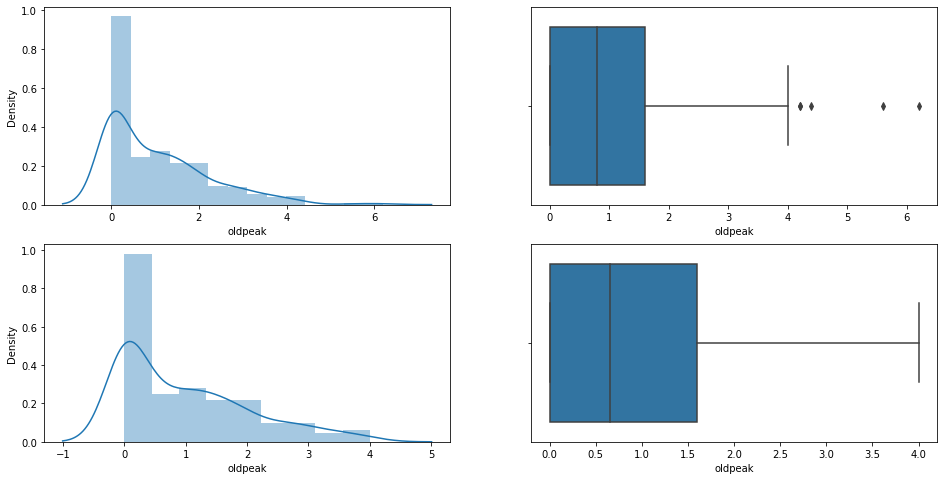

In [42]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['oldpeak'])
plt.subplot(2,2,2)
sns.boxplot(df['oldpeak'])
plt.subplot(2,2,3)
sns.distplot(new_df['oldpeak'])
plt.subplot(2,2,4)
sns.boxplot(new_df['oldpeak'])
plt.show()

## Exploratory data analysis on categorical and numerical with target variable

In [43]:
 new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    int64  
 1   sex       298 non-null    object 
 2   cp        298 non-null    object 
 3   trestbps  298 non-null    int64  
 4   chol      298 non-null    int64  
 5   fbs       298 non-null    bool   
 6   restecg   298 non-null    object 
 7   thalach   298 non-null    int64  
 8   exang     298 non-null    object 
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    object 
 11  ca        298 non-null    float64
 12  thal      298 non-null    int64  
 13  target    298 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 32.9+ KB


<AxesSubplot:xlabel='target', ylabel='age'>

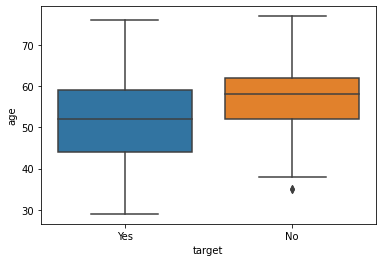

In [44]:
#age with target
sns.boxplot(x='target',y='age',data=new_df)

In [45]:
#the rate of heart attacks are more at age of 45-60

<AxesSubplot:xlabel='sex', ylabel='count'>

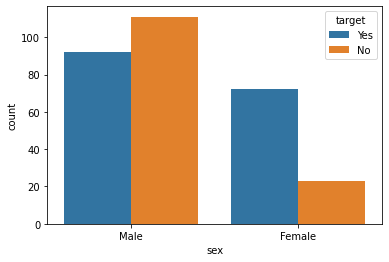

In [46]:
#sex with target
sns.countplot(x='sex',data=new_df,hue='target')

In [47]:
#heart attack is high in male around 90% compared to female

<AxesSubplot:xlabel='cp', ylabel='count'>

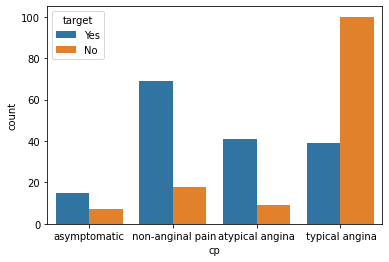

In [48]:
#cp(chest pain) with target
sns.countplot(x='cp',data=new_df,hue='target')

In [49]:
#chest pain is high in patients who have non-anginal

<AxesSubplot:xlabel='fbs', ylabel='count'>

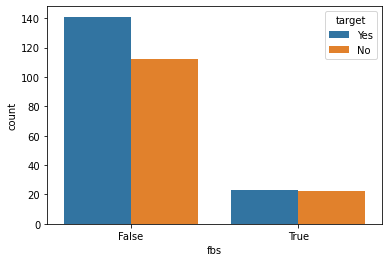

In [50]:
#fbs (fasting blood sugar)
sns.countplot(x='fbs',data=new_df,hue='target')

In [51]:
# heart attacks are high in people who dont have fasting blood sugar

<AxesSubplot:xlabel='restecg', ylabel='count'>

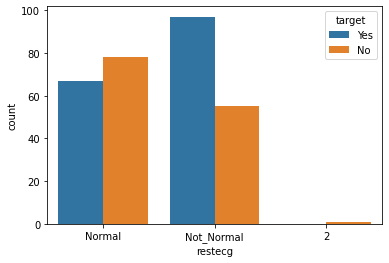

In [52]:
#restecg
sns.countplot(x='restecg',data=new_df,hue='target')

In [53]:
## heart attacks are high in people who are having non-normal restecg

<AxesSubplot:xlabel='thalach', ylabel='Count'>

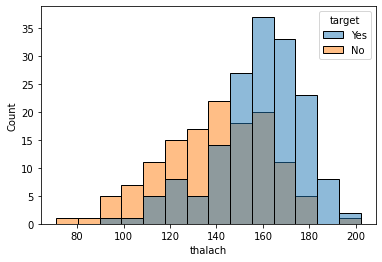

In [54]:
#thalach
sns.histplot(x='thalach',data=new_df,hue='target')

In [55]:
#heart attacks are high for which thalach is 160 

<AxesSubplot:xlabel='exang', ylabel='count'>

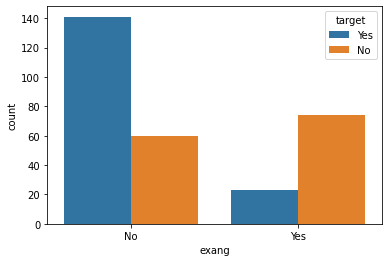

In [56]:
sns.countplot(x="exang",data=new_df,hue="target")

In [57]:
#200 people who don't have chest pain while exersice 140 people got heart attack and 60 don't got heart attack

#100 people who had chest pain while exersice 80 people did't got heart attack and 20 got heart attack

<AxesSubplot:xlabel='ca', ylabel='count'>

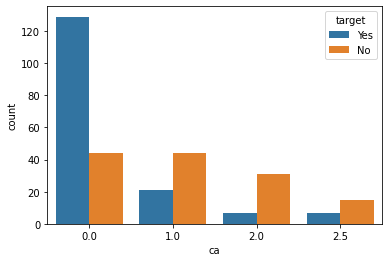

In [58]:
sns.countplot(x="ca",data=new_df,hue="target")

<AxesSubplot:xlabel='slope', ylabel='count'>

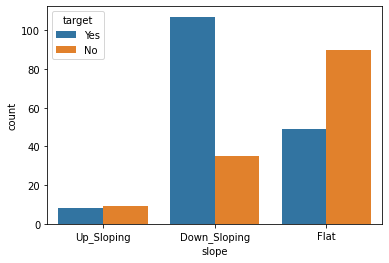

In [59]:
sns.countplot(x="slope",data=new_df,hue="target")

In [60]:
#The number of blood vessel blocked 0 has highest rate of heart disease

<Figure size 216x216 with 0 Axes>

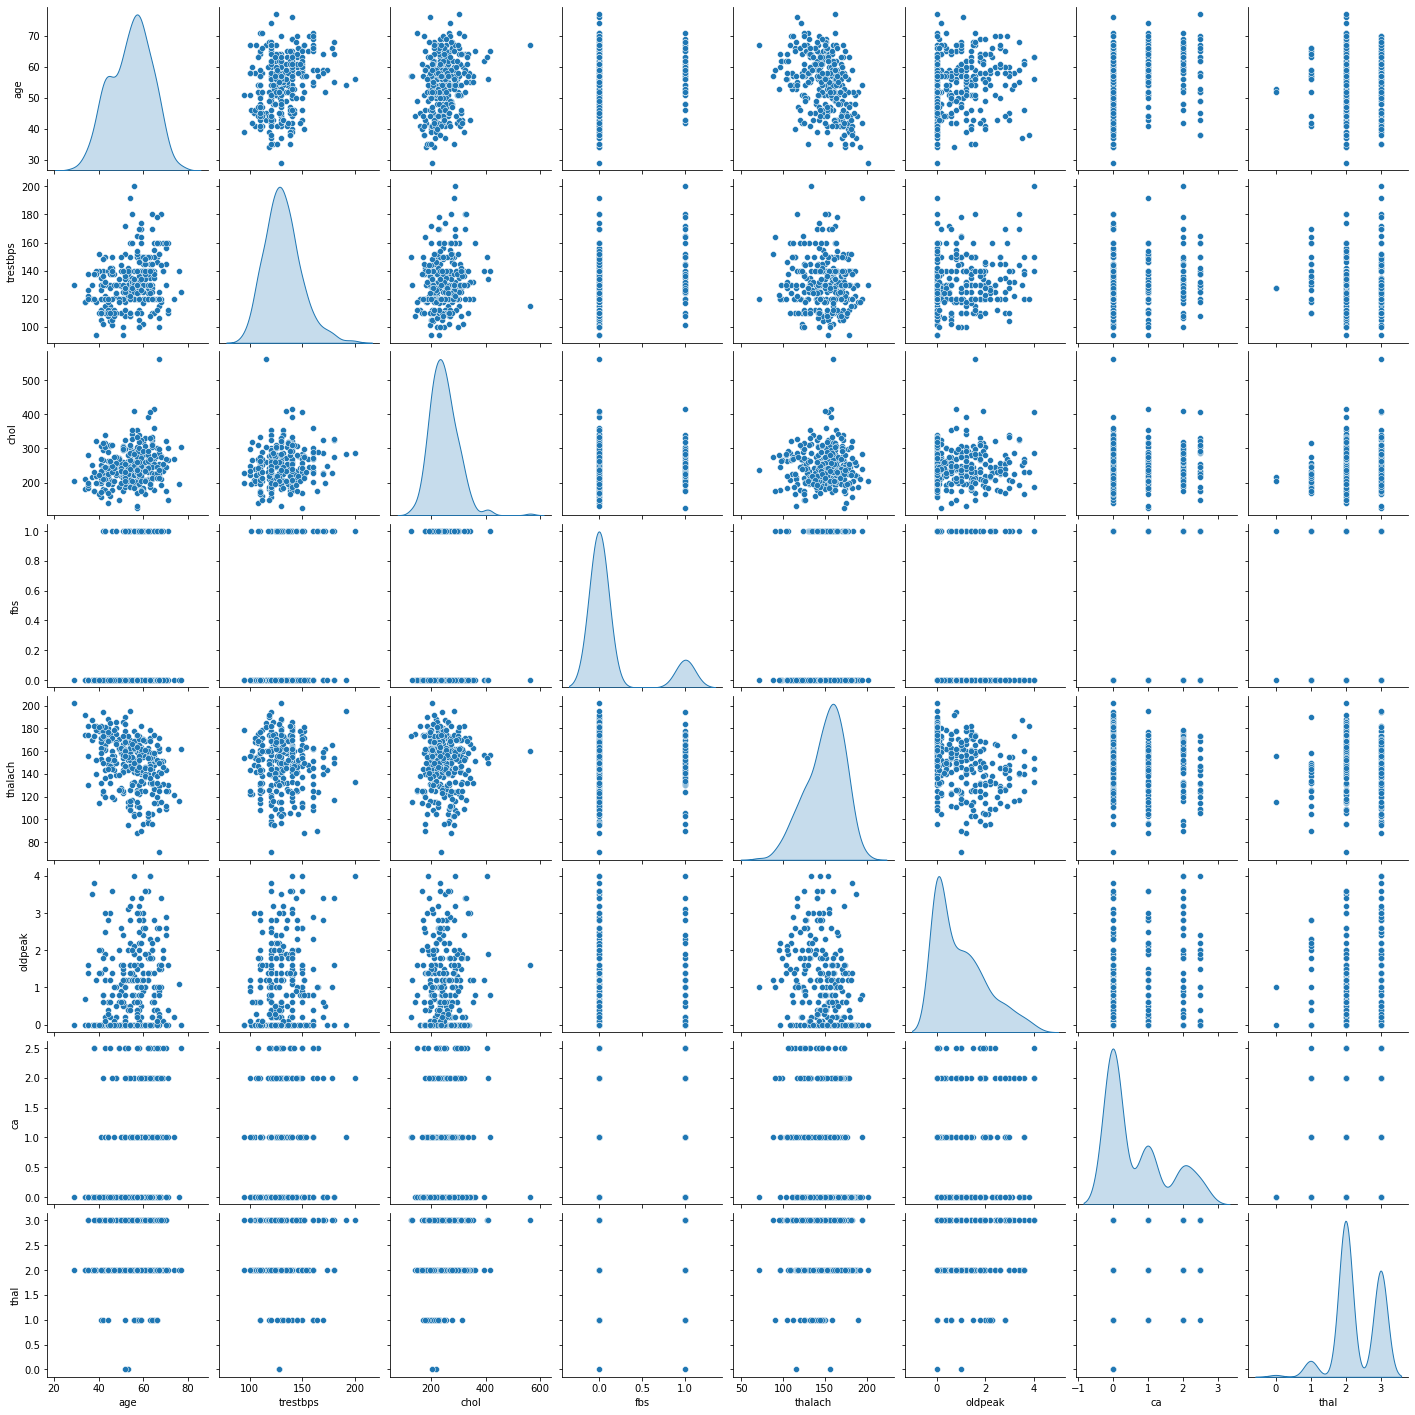

In [61]:
plt.figure(figsize=(3,3))
sns.pairplot(new_df,diag_kind='kde',kind='scatter')

([<matplotlib.patches.Wedge at 0x21293aa5250>,
 [Text(-0.17322324005045966, 1.086275153497686, 'Yes'),
  Text(0.1732233417548791, -1.0862751372793509, 'No')],
 [Text(-0.09448540366388708, 0.5925137200896468, '55.03%'),
  Text(0.09448545913902495, -0.5925137112432822, '44.97%')])

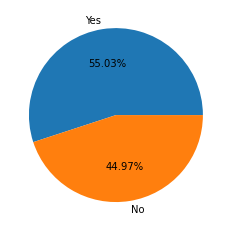

In [62]:
# target variable 
lbl=list(new_df.target.unique())
values=list(new_df.target.value_counts())
plt.pie(values,labels=lbl,autopct="%.2f%%")

In [63]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,True,Normal,150,No,2.3,Up_Sloping,0.0,1,Yes
1,37,Male,non-anginal pain,130,250,False,Not_Normal,187,No,3.5,Up_Sloping,0.0,2,Yes
2,41,Female,atypical angina,130,204,False,Normal,172,No,1.4,Down_Sloping,0.0,2,Yes
3,56,Male,atypical angina,120,236,False,Not_Normal,178,No,0.8,Down_Sloping,0.0,2,Yes
4,57,Female,typical angina,120,354,False,Not_Normal,163,Yes,0.6,Down_Sloping,0.0,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,typical angina,140,241,False,Not_Normal,123,Yes,0.2,Flat,0.0,3,No
299,45,Male,asymptomatic,110,264,False,Not_Normal,132,No,1.2,Flat,0.0,3,No
300,68,Male,typical angina,144,193,True,Not_Normal,141,No,3.4,Flat,2.0,3,No
301,57,Male,typical angina,130,131,False,Not_Normal,115,Yes,1.2,Flat,1.0,3,No


## one hot encoding of categorical columns

In [64]:
categorical_col=["age","sex","cp","fbs","restecg","slope","exang","target"]

In [65]:
from sklearn.preprocessing import LabelEncoder 
encode=LabelEncoder()
for x in categorical_col:
    new_df[x]=encode.fit_transform (new_df[x])

In [66]:
new_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,145,233,1,1,150,0,2.3,2,0.0,1,1
1,3,1,0,130,250,0,2,187,0,3.5,2,0.0,2,1
2,7,0,3,130,204,0,1,172,0,1.4,0,0.0,2,1
3,22,1,3,120,236,0,2,178,0,0.8,0,0.0,2,1
4,23,0,1,120,354,0,2,163,1,0.6,0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,1,140,241,0,2,123,1,0.2,1,0.0,3,0
299,11,1,2,110,264,0,2,132,0,1.2,1,0.0,3,0
300,34,1,1,144,193,1,2,141,0,3.4,1,2.0,3,0
301,23,1,1,130,131,0,2,115,1,1.2,1,1.0,3,0


In [67]:
#cataegorical variables changed to numerical values


## chi square test for categorical variables

In [68]:
#splitting the data
y=new_df['target']
x=new_df.drop(["target"],axis=1)

In [69]:
x_cat=x[['sex','cp','fbs','restecg','slope','exang']]
y=y.to_frame()

In [70]:
from sklearn.feature_selection import SelectKBest
#k is the number of features you want to select 
from sklearn.feature_selection import chi2

In [71]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_cat, y)
x_cat_fs = fs.transform(x_cat)
fs.scores_


array([ 7.73960666,  0.92659314,  0.27977592,  1.73870219, 21.31489844,
       38.45568924])

Feature 0: 7.739607
Feature 1: 0.926593
Feature 2: 0.279776
Feature 3: 1.738702
Feature 4: 21.314898
Feature 5: 38.455689


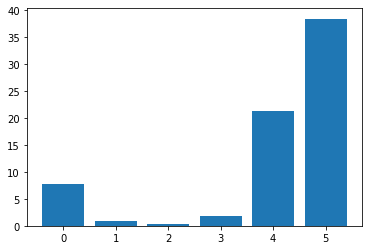

In [72]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [73]:
#The larger the score the features are significant
#From the above score and graph we can choose the features with highest values 0,3,4,5,sex,restecg,slope,exang.
#So droping the cp and fbs columns

## RFE -Recursive Feature Engineerinng

In [74]:
from sklearn.feature_selection import RFE

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [76]:
x_num=x[["age","trestbps","chol","thalach","oldpeak"]]
model=LogisticRegression()
rfe=RFE(model,n_features_to_select=4)
rfe_fit=rfe.fit(x_num,y)

C:\Users\shravya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shravya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [77]:
print("num of Features", rfe_fit.n_features_)
print("selected Features", rfe_fit.support_)
print("feature Rank",rfe_fit.ranking_)

num of Features 4
selected Features [False  True  True  True  True]
feature Rank [2 1 1 1 1]


In [78]:
for i,j in enumerate(rfe_fit.ranking_):
    if(j==1):
        print(x_num.columns[i])

trestbps
chol
thalach
oldpeak


In [79]:
# from rfe we found that age feature is not significant 

## splitting the data

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=24)

In [81]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(208, 13)
(90, 13)
(208, 1)
(90, 1)


## scaling the data

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [83]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)


## logistic regression model

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\shravya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [86]:
pred_train=logmodel.predict(x_train)
pred_test=logmodel.predict(x_test)
pred_test


array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1])

In [87]:
#training

In [88]:
df_pred=pd.DataFrame(logmodel.predict_proba(x_train))


In [89]:
df_pred['pred_train']=pred_train

In [90]:
df_pred

,0,1,pred_train
0,0.082883,0.917117,1
1,0.443403,0.556597,1
2,0.596961,0.403039,0
3,0.761432,0.238568,0
4,0.111825,0.888175,1
...,...,...,...
203,0.629584,0.370416,0
204,0.018969,0.981031,1
205,0.088981,0.911019,1
206,0.125746,0.874254,1


In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(y_train, pred_train))
print(accuracy_score(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        92
           1       0.82      0.84      0.83       116

    accuracy                           0.81       208
   macro avg       0.81      0.81      0.81       208
weighted avg       0.81      0.81      0.81       208

0.8125


In [92]:
## Our model achieved 81.25% accuracy, which is pretty good.

In [93]:
# confusion matrix
conf_mat_heart = confusion_matrix(y_true=y_train, y_pred=pred_train)
pd.DataFrame(conf_mat_heart)

,0,1
0,71,21
1,18,98


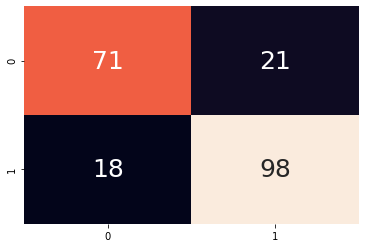

In [94]:
sns.heatmap(conf_mat_heart, annot=True, cbar=False, fmt = 'g', annot_kws={'size':25});

In [95]:
# from classification matrix we can say that the algorithm made 18 out of 72 and 21 out of 98 predictions. with an accuracy of 81% 

In [96]:
#testing
df_pred1 = pd.DataFrame(logmodel.predict_proba(x_test))

In [97]:
df_pred1['pred_test']=pred_test

In [98]:
df_pred1

,0,1,pred_test
0,0.149832,0.850168,1
1,0.883496,0.116504,0
2,0.805701,0.194299,0
3,0.152594,0.847406,1
4,0.438914,0.561086,1
...,...,...,...
85,0.969508,0.030492,0
86,0.288518,0.711482,1
87,0.130250,0.869750,1
88,0.895723,0.104277,0


In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
print(classification_report(y_test, pred_test))
print(accuracy_score(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77        42
           1       0.77      0.92      0.84        48

    accuracy                           0.81        90
   macro avg       0.83      0.80      0.81        90
weighted avg       0.82      0.81      0.81        90

0.8111111111111111


In [101]:
conf_mat_heart1 = confusion_matrix(y_true=y_test, y_pred=pred_test)
pd.DataFrame(conf_mat_heart1)

,0,1
0,29,13
1,4,44


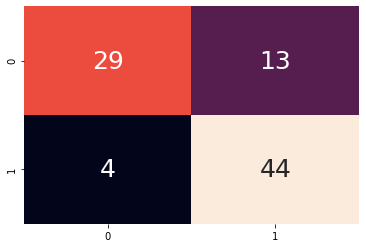

In [102]:
sns.heatmap(conf_mat_heart1, annot=True, cbar=False, fmt = 'g', annot_kws={'size':25});

In [ ]:
#from classification matrix we can say that the algorithm made 4 out of 29 and 13 out of 44 predictions with an accuracy of 81% 

In [103]:
# ROC and AUC curve
FPR, TPR, _ = roc_curve(y_train, pred_train)
FPR1, TPR1, _ = roc_curve(y_test,pred_test)

In [104]:
auc_train = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train)

auc_test = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test)

Train AUC: 0.808
Test AUC: 0.804


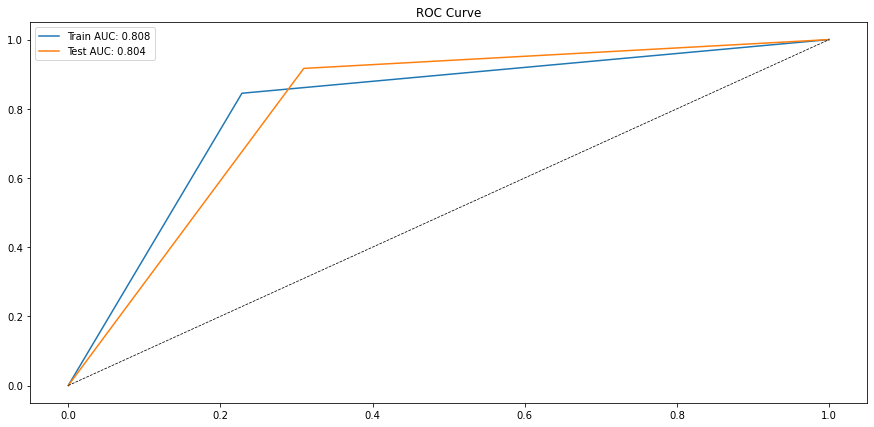

In [105]:
plt.figure(figsize=(15,7))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test)

plt.plot([0,1],[0,1], ls = '--', color = 'black', lw = 0.75)

plt.title('ROC Curve')
plt.legend()
plt.show();